In [1]:
from numpy import zeros
from random import randint
from random import random
from matplotlib import pyplot
from random import random
from random import randint
from numpy import array
from numpy import zeros
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
# generate the next frame in the sequence
def next_frame(last_step, last_frame, column):
    # define the scope of the next step
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
  # choose the row index for the next step
    step = randint(lower, upper)
  # copy the prior frame
    frame = last_frame.copy()
  # add the new step
    frame[step, column] = 1
    return frame, step

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def build_frames(size):
    frames = list()
      # create the first frame
    frame = zeros((size,size))
    step = randint(0, size-1)
      # decide if we are heading left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
      # create all remaining frames
    for i in range(1, size):
        col = i if right else size-1-i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

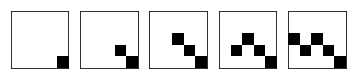

In [4]:
# generate sequence of frames
size = 5
frames, right = build_frames(size)
# plot all frames
pyplot.figure()
for i in range(size):
     # create a gray scale subplot for each frame
    pyplot.subplot(1, size, i+1) 
    pyplot.imshow(frames[i], cmap='Greys') 
    # turn of the scale to make it clearer 
    ax = pyplot.gca() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)
    # show the plot
pyplot.show()

You can see that the line wiggles around from left to right across the image, one pixel per time step.

In [5]:
# generate multiple sequences of frames and reshape for network input
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    # resize as [samples, timesteps, width, height, channels]
    X = array(X).reshape(n_patterns, size, size, size, 1)
    y = array(y).reshape(n_patterns, 1)
    return X, y

In [6]:
# configure problem
size = 50

In [7]:
# define the model
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2,2), activation='relu'), input_shape=(None,size,size,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                240600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________


Define a Conv2D as an input layer with 2 filters and a 2 × 2 kernel to pass across the input images. <br/>
The Conv2D will output 2 49 × 49 pixel impressions of the input. <br/>
Convolutional layers are often immediately followed by a pooling layer. Here we use a MaxPooling2D pooling layer with a pool size of 2 × 2, which will in effect halve the size of each filter output from the previous layer, in turn outputting two 24 × 24 maps. <br/>
The pooling layer is followed by a Flatten layer to transform the [24,24,2] 3D output from the MaxPooling2D layer into a one-dimensional 1,152 element vector. <br/>
Use a single LSTM layer with 50 memory cells. <br/>
The use of a TimeDistributed wrapper around the whole CNN model means that the LSTM will see 50 time steps, with each time step presenting a 1,152 element vector as input. <br/>
This is a binary classification problem, so we will use a Dense output with a single neuron and the sigmoid activation function. <br/>
The model is compiled to minimize log loss (binary crossentropy) with the Adam implementation of gradient descent and the binary
classification accuracy will be reported.<br/>

In [8]:
# fit model
X, y = generate_examples(size, 5000)
model.fit(X, y, batch_size=32, epochs=1)

Epoch 1/1
5000/5000 [==============================] - 53s 11ms/step - loss: 0.2215 - acc: 0.9176


In [9]:
# evaluate model
X, y = generate_examples(size, 100)
loss, acc = model.evaluate(X, y, verbose=0) 
print('loss: %f, acc: %f' % (loss, acc*100))

loss: 0.090983, acc: 98.000000


In [10]:
#prediction on new data
X, y = generate_examples(size, 1)

In [11]:
X

array([[[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],


In [12]:
y

array([[1]])

In [13]:
yhat = model.predict_classes(X, verbose=0)
expected = "Right" if y[0]==1 else "Left"
predicted = "Right" if yhat[0]==1 else "Left" 
print('Expected: %s, Predicted: %s' % (expected, predicted))

Expected: Right, Predicted: Right
